In [1]:
# from methods import OA_SA, VA_SA
import numpy as np
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
from utils.plot_results import plot
import pandas as pd

In [2]:

# env_configs = {
#         "K" : 50,
#         "Q" : 100, 
#         "DoD" : 0.5,
#         "vehicle_capacity" : 25,
#         "re_optimization" : False,
#         "costs_KM" : [1, 1], 
#         "emissions_KM" : [.1, .3]
#     }

# env_configs = {
#             "K" : 50,
#             "Q" : 70, 
#             "DoD" : 0.7,
#             "vehicle_capacity" : 25,
#             "re_optimization" : True,
#             "costs_KM" : [1, 1],
#             "emissions_KM" : [.1, .3],
#             "n_scenarios" : 500
#         }

In [3]:

# file = "res_wReOpt_500"
# file = "res_TSP"
# file = "res_TSP_fullDyn_100"
file = "res_TSP_fullDyn_100"
with open(f'results/{file}/env_configs.pkl', 'rb') as f:
    env_configs = pickle.load(f)


with open(f'results/{file}/res_offline.pkl', "rb") as f:
    res_offline = pickle.load(f)

with open(f'results/{file}/res_SL.pkl', "rb") as f:
    res_SL = pickle.load(f)
    
with open(f'results/{file}/res_RL_DQN.pkl', "rb") as f:
    res_RL = pickle.load(f)
    
# with open(f'results/{file}/res_RL_DQN_equiProb.pkl', "rb") as f:
#     res_RL_equiProb = pickle.load(f)
    
# with open(f'results/{file}/res_RL_PPO.pkl', "rb") as f:
#     res_RL_PPO = pickle.load(f)

with open(f'results/{file}/res_MSA.pkl', "rb") as f:
    res_MSA = pickle.load(f)

with open(f'results/{file}/res_greedy.pkl', "rb") as f:
    res_greedy = pickle.load(f)

with open(f'results/{file}/res_random.pkl', "rb") as f:
    res_random = pickle.load(f)
    

data = {
    "Offline" : res_offline['rs'],
    "MSA" : res_MSA['rs'],
    "Greedy" : res_greedy['rs'],
    "DQN" : res_RL['rs'],
    "SL" : res_SL['rs'],
    # "DQN u" : res_RL_equiProb['rs'],
    # "RL (PPO)" : res_RL_PPO['rs'], 
    "Random" : res_random['rs'],
}
    
    

In [4]:
df = pd.DataFrame(data)
df

,Offline,MSA,Greedy,DQN,SL,Random
0,29.0,27.0,24.0,30.0,25.0,21.0
1,29.0,23.0,24.0,30.0,30.0,22.0
2,30.0,30.0,29.0,30.0,28.0,20.0
3,28.0,30.0,30.0,30.0,26.0,21.0
4,28.0,26.0,27.0,30.0,25.0,22.0
...,...,...,...,...,...,...
95,28.0,26.0,27.0,29.0,30.0,21.0
96,30.0,30.0,30.0,30.0,30.0,25.0
97,30.0,21.0,24.0,30.0,23.0,15.0
98,26.0,29.0,29.0,30.0,23.0,20.0


<Axes: >

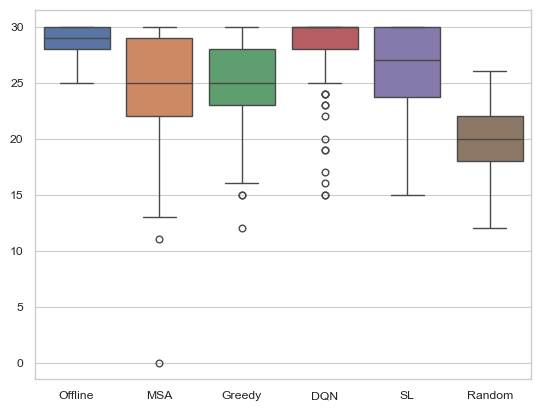

In [5]:
sns.boxplot(data=data)

In [6]:
env_configs

{'K': 50,
 'Q': 100,
 'DoD': 1.0,
 'vehicle_capacity': 30,
 're_optimization': False,
 'costs_KM': [1],
 'emissions_KM': [0.3],
 'n_scenarios': 100,
 'test': True}

In [7]:
data['Offline'].mean()

np.float64(28.87)

In [8]:
[data[k].mean() for k in data.keys()]

[np.float64(28.87),
 np.float64(24.6),
 np.float64(24.79),
 np.float64(28.17),
 np.float64(26.19),
 np.float64(19.78)]

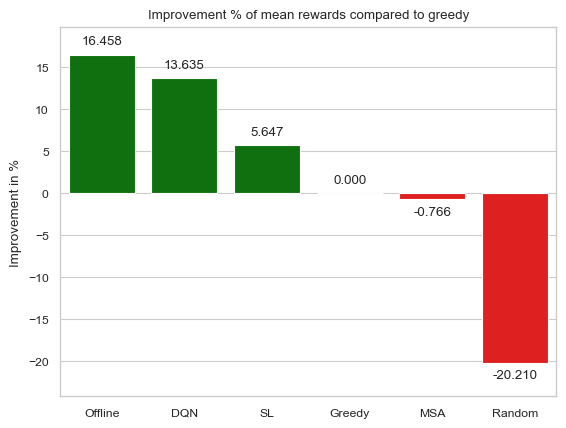

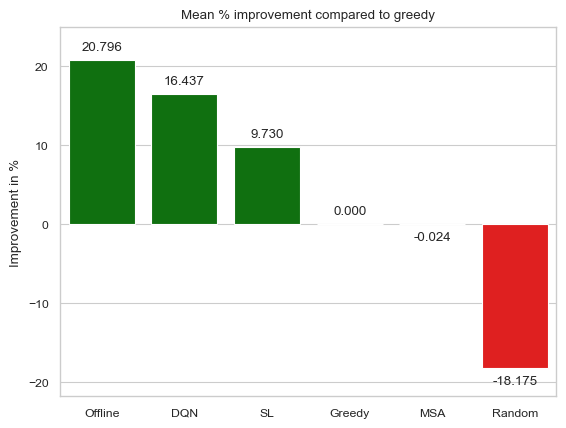

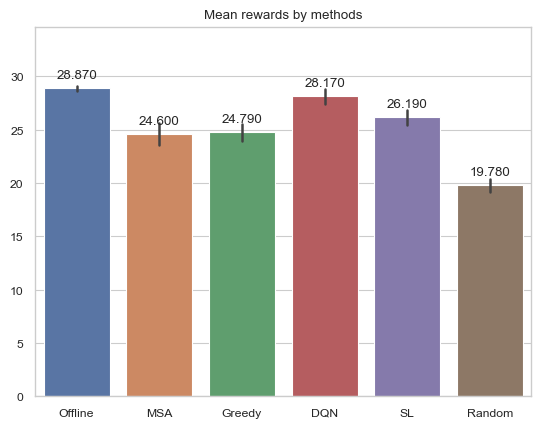

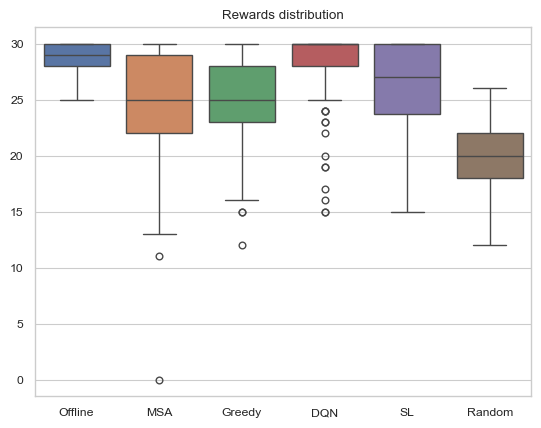

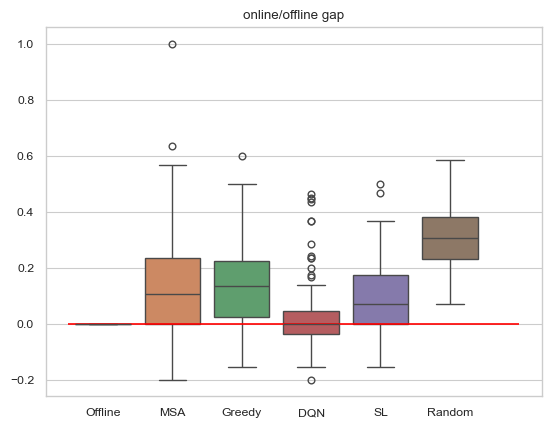

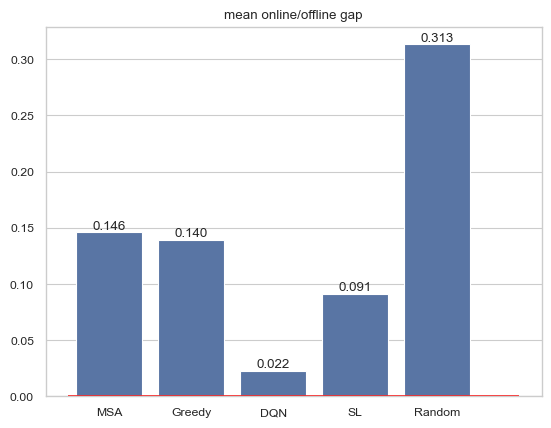

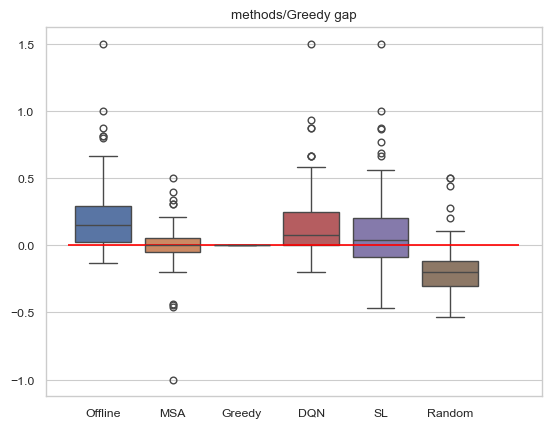

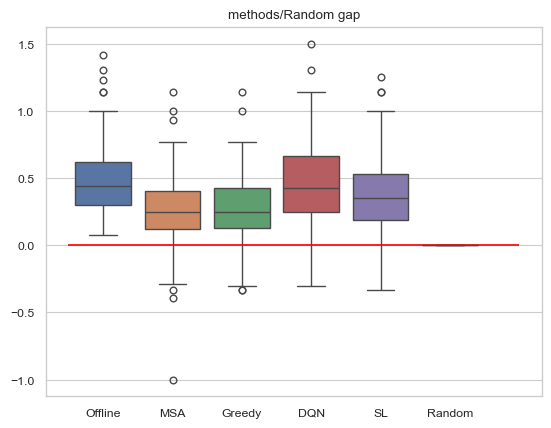

In [9]:
sns.color_palette("deep")
plot(data)

In [10]:
assert False

AssertionError: 

In [11]:
with open(f'results/res_TSP_fullDynamic/res_random.pkl', "rb") as f:
    res_random = pickle.load(f)
len(res_random["rs"])

500

In [12]:
df = pd.DataFrame(columns=["epoch", "rs"])
rs = np.load("results/dqn_rs.npy")
rs = np.concatenate(
    [res_random["rs"][None], rs],
    axis=0
)
df["rs"] = rs.flatten()
df["epoch"] = np.array([len(rs[i])*[i] for i in range(len(rs))]).flatten()
df

,epoch,rs
0,0,19.0
1,0,20.0
2,0,25.0
3,0,22.0
4,0,23.0
...,...,...
6495,12,17.0
6496,12,16.0
6497,12,30.0
6498,12,30.0


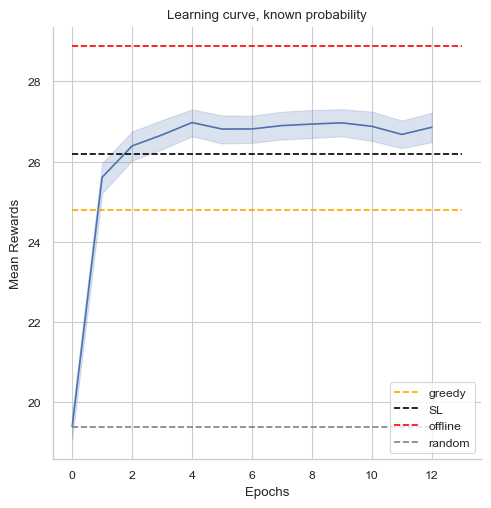

In [13]:
sns.relplot(
    data=df, kind="line",
    x="epoch", y="rs",
    errorbar=("ci", 95),
    # markers=True, dashes=False
)
plt.hlines(res_greedy["rs"].mean(), 0, len(rs), 'orange', label="greedy", linestyles='--')
plt.hlines(res_SL["rs"].mean(), 0, len(rs), 'black', label="SL", linestyles='--')
plt.hlines(res_offline["rs"].mean(), 0, len(rs), 'red', label="offline", linestyles='--')
plt.hlines(res_random["rs"].mean(), 0, len(rs), 'gray', label="random", linestyles='--')
plt.xlabel('Epochs')
plt.ylabel('Mean Rewards')
plt.title('Learning curve, known probability')
plt.legend(loc='lower right')
plt.show()

## VA RL

### Plots

In [37]:
import pickle

wo = 'woReOpt'
w = 'wReOpt'
# file = "res_woReOpt_500"
# file = "res_clusters_test"
file = "res_VRP_DoD100_Q100"

# file = "res_VRP_fullDyn"
# file = "res_wReOpt_500"
# file = "res_TSP"
# file = "res_TSP_fullDynamic"
with open(f'results/{file}/{w}/env_configs.pkl', 'rb') as f:
    env_configs = pickle.load(f)
try:
    env_configs["horizon"] = env_configs["K"]
    env_configs.pop("K")
except:
    pass
print(env_configs)

with open(f'results/{file}/res_offline.pkl', "rb") as f:
    res_offline = pickle.load(f)

with open(f'results/{file}/{w}/res_RL_DQN_OA.pkl', "rb") as f:
    res_RL = pickle.load(f)
    
with open(f'results/{file}/{w}/res_MSA.pkl', "rb") as f:
    res_MSA = pickle.load(f)

with open(f'results/{file}/{w}/res_greedy.pkl', "rb") as f:
    res_greedy = pickle.load(f)

with open(f'results/{file}/{w}/res_random.pkl', "rb") as f:
    res_random = pickle.load(f)
    
    
with open(f'results/{file}/{wo}/res_greedy.pkl', "rb") as f:
    res_greedy_wo = pickle.load(f)
    
with open(f'results/{file}/{wo}/res_RL_DQN_VRP_VA.pkl', "rb") as f:
    res_RL_wo = pickle.load(f)
    
with open(f'results/{file}/{wo}/res_MSA.pkl', "rb") as f:
    res_MSA_wo = pickle.load(f)

with open(f'results/{file}/{wo}/res_random.pkl', "rb") as f:
    res_random_wo = pickle.load(f)

{'horizon': 50, 'Q': 100, 'DoD': 1.0, 'vehicle_capacity': 20, 're_optimization': True, 'costs_KM': [1, 1], 'emissions_KM': [0.1, 0.3], 'test': True}


In [38]:
df = pd.DataFrame(columns=["epoch", "rs"])
# rs = np.load('results/dqn_rs_VA.npy')
rs = np.load('results/dqn_real_DoD100_Q100_rs_VA_train.npy')
# rs = np.concatenate(
#     [res_greedy_wo["rs"][None], rs],
#     axis=0
# )
df["rs"] = rs.flatten()
df["epoch"] = np.array([len(rs[i])*[i] for i in range(len(rs))]).flatten()
df

,epoch,rs
0,0,19.0
1,0,25.0
2,0,26.0
3,0,21.0
4,0,30.0
...,...,...
4995,9,38.0
4996,9,40.0
4997,9,36.0
4998,9,30.0


In [39]:
df_test = pd.DataFrame(columns=["epoch", "rs"])
# rs_test = np.load('results/dqn_rs_VA_test.npy')
rs_test = np.load('results/dqn_real_DoD100_Q100_rs_VA_test.npy')
# rs = np.concatenate(
#     [res_greedy_wo["rs"][None], rs],
#     axis=0
# )
df_test["rs"] = rs_test.flatten()
df_test["epoch"] = np.array([len(rs_test[i])*[i] for i in range(len(rs_test))]).flatten()
df_test

,epoch,rs
0,0,16.0
1,0,23.0
2,0,21.0
3,0,23.0
4,0,18.0
...,...,...
1095,10,38.0
1096,10,40.0
1097,10,38.0
1098,10,34.0


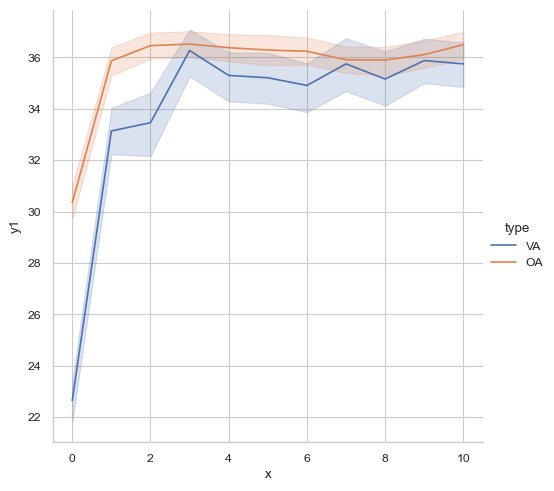

In [40]:
rs_VA = np.load('results/dqn_real_DoD100_Q100_rs_VA_test.npy')
x = np.array([len(rs_VA[i])*[i] for i in range(len(rs_VA))]).flatten()
df1 = pd.DataFrame({'x': x, 'y1': rs_VA.flatten(), 'type': 'VA'})

rs_OA = np.load('results/dqn_real_DoD100_Q100_rs_OA_test.npy')
# x_test = np.array([len(rs_test[i])*[i] for i in range(len(rs_test))]).flatten()
df2 = pd.DataFrame({'x': x, 'y2': rs_OA.flatten(), 'type': 'OA'}).rename(columns={'y2': 'y1'})

df = pd.concat([df1, df2], ignore_index=True)

# plot df
g = sns.relplot(data=df, x='x', y='y1', kind='line', hue='type')#, palette=['orange', 'blue'])

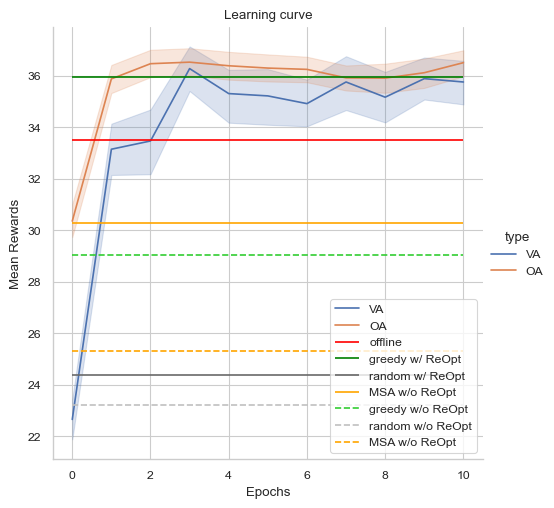

In [41]:
# episode_durations = np.load('results/dqn_rs_VA.npy')
# plt.plot(y, label="RL (DQN)")
# plt.hlines(res_SL["rs"].mean(), 0, 5, 'black', label="SL", linestyles='--')
# sns.relplot(
#     data=df, kind="line",
#     x="epoch", y="rs",
#     errorbar=("ci", 95),
    
#     # markers=True, dashes=False
# )

sns.relplot(
    data=df, kind="line",
    x="x", y="y1",
    hue='type',# palette=['orange', 'blue'],
    errorbar=("ci", 95),
    # markers=True, dashes=False
)

# sns.relplot(
#     data=df_test, kind="line",
#     x="epoch", y="rs",
#     errorbar=("ci", 95),
#     # markers=True, dashes=False
# )

plt.hlines(res_offline["rs"].mean(), 0, len(rs), 'red', label="offline", linestyles='solid')
plt.hlines(res_greedy["rs"].mean(), 0, len(rs), 'green', label="greedy w/ ReOpt", linestyles='solid')
plt.hlines(res_random["rs"].mean(), 0, len(rs), 'dimgray', label="random w/ ReOpt", linestyles='solid')
plt.hlines(res_MSA["rs"].mean(), 0, len(rs), 'orange', label="MSA w/o ReOpt", linestyles='solid')
plt.hlines(res_greedy_wo["rs"].mean(), 0, len(rs), 'limegreen', label="greedy w/o ReOpt", linestyles='--')
plt.hlines(res_random_wo["rs"].mean(), 0, len(rs), 'silver', label="random w/o ReOpt", linestyles='--')
plt.hlines(res_MSA_wo["rs"].mean(), 0, len(rs), 'orange', label="MSA w/o ReOpt", linestyles='--')

plt.xlabel('Epochs')
plt.ylabel('Mean Rewards')
plt.title('Learning curve')
plt.legend()
plt.show()

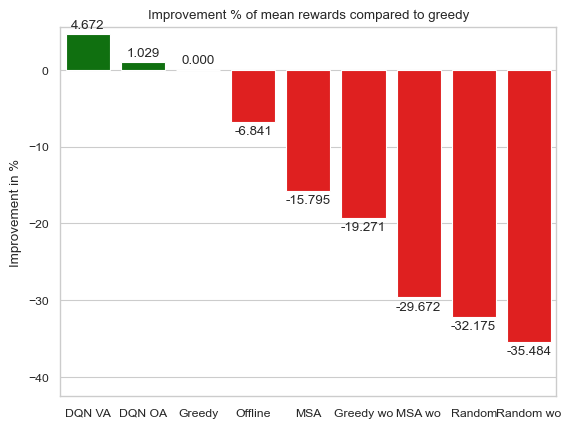

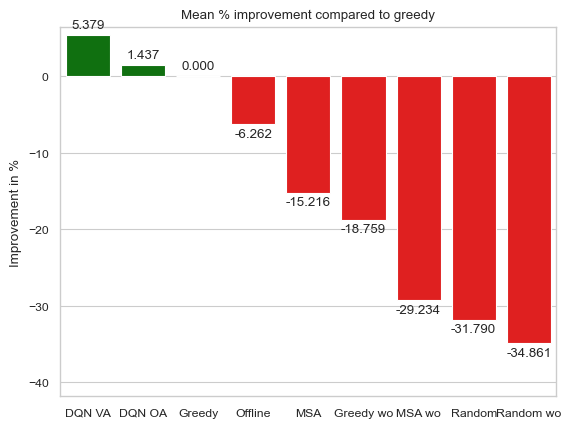

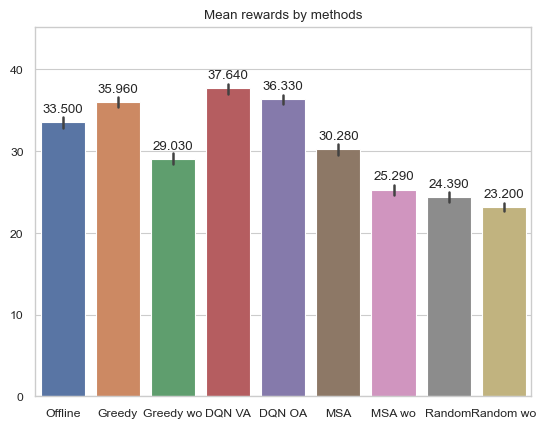

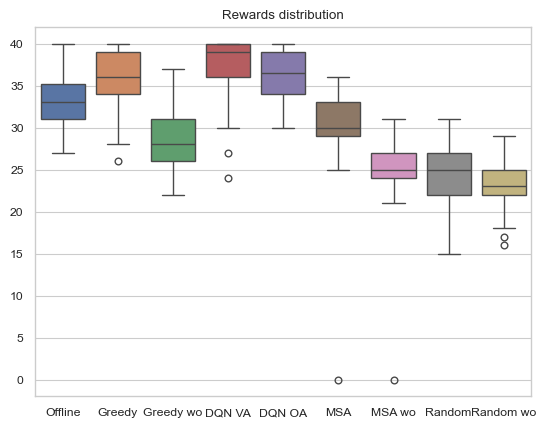

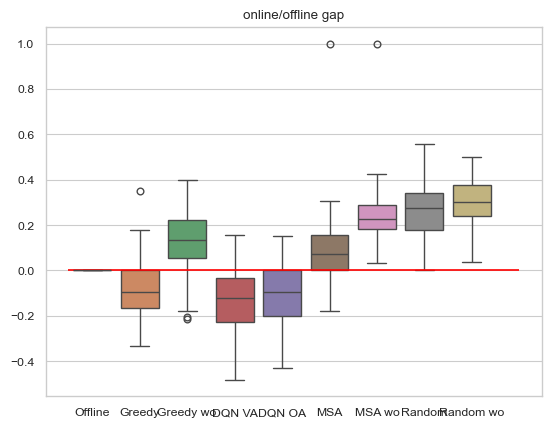

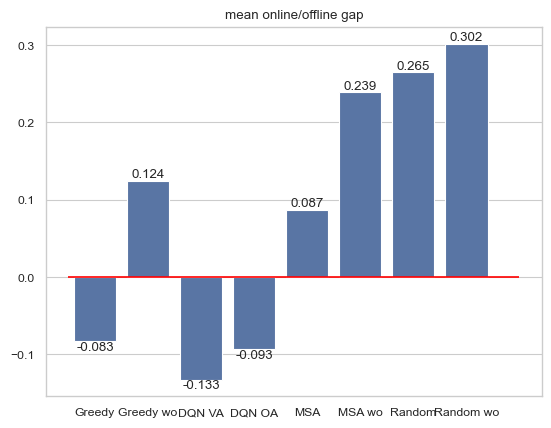

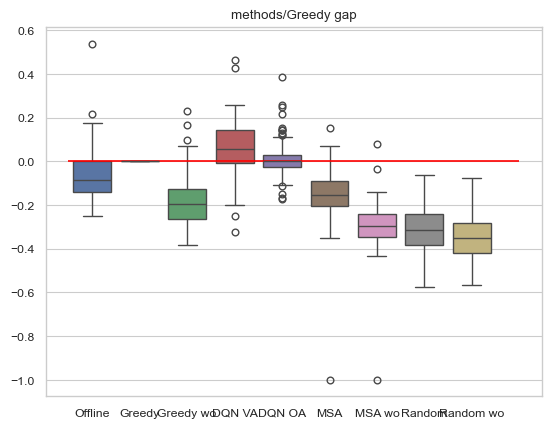

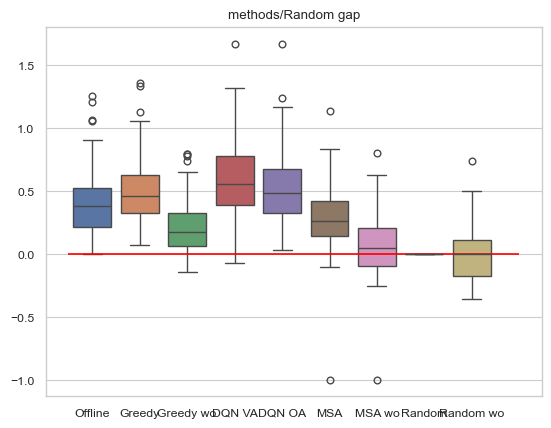

In [42]:
data = {
    "Offline" : res_offline['rs'],
    "Greedy" : res_greedy['rs'],
    "Greedy wo" : res_greedy_wo['rs'],
    # "SL" : res_SL['rs'],
    "DQN VA" : res_RL_wo['rs'],
    "DQN OA" : res_RL['rs'],
    # "MSA" : res_MSA['rs'],
    "MSA" : res_MSA['rs'],
    "MSA wo" : res_MSA_wo['rs'], # w/o ReOpt
    # "DQN u" : res_RL_equiProb['rs'],
    # "RL (PPO)" : res_RL_PPO['rs'], 
    "Random" : res_random['rs'],
    "Random wo" : res_random_wo['rs'],
}

sns.color_palette("deep")
plot(data)

### RL vs Greedy

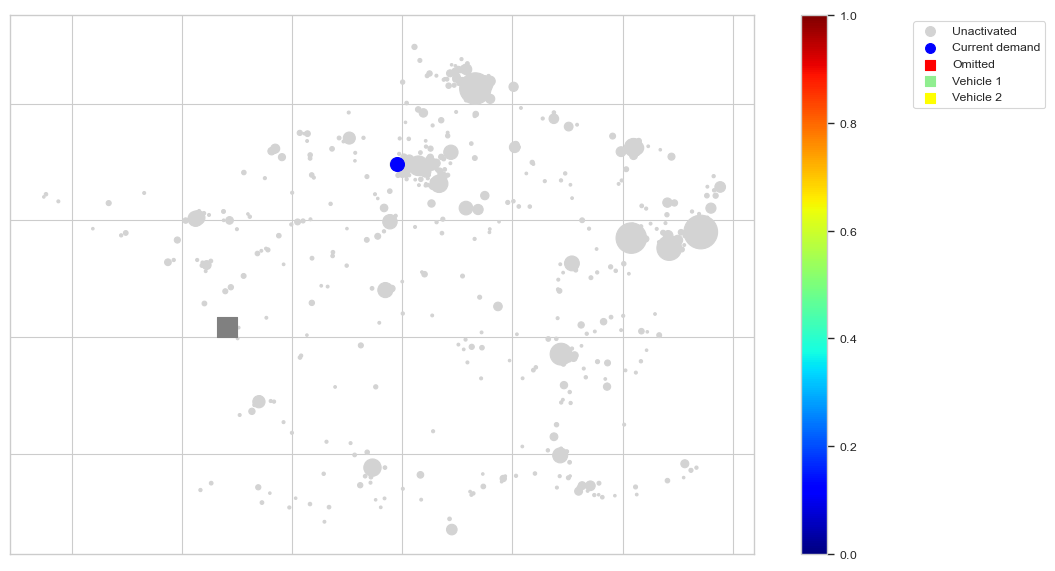

'\\documentclass{report}\n\\usepackage{tikz}\n\\usepackage{subcaption}\n\n\\begin{document}\n\\begin{figure}\n  \\begin{tikzpicture}\n      \\draw\n        (-1.173, 46.162) node[gray] (0){0};\n      \\begin{scope}[->]\n      \\end{scope}\n    \\end{tikzpicture}\n\\end{figure}\n\\end{document}'

In [49]:
from envs import DynamicQVRPEnv
scenario = 2

env = DynamicQVRPEnv(**env_configs)
env.reset(scenario)
env.render()

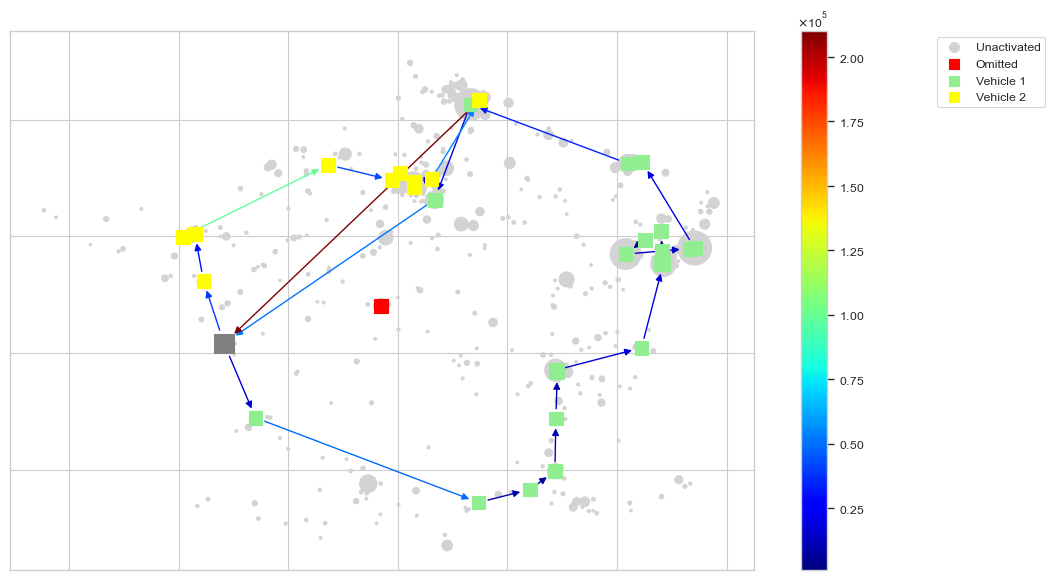

{'assignment': array([2, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2,
        1, 1, 2, 2, 0, 2, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0]),
 'routes': array([[ 0, 15, 31, 29, 24, 10, 30,  3, 12, 14, 19,  6, 13, 23, 17, 16,
          8, 20, 11,  4,  2,  0],
        [ 0, 25,  7, 26,  9,  1,  5, 21, 28, 22, 18,  0,  0,  0,  0,  0,
          0,  0,  0,  0,  0,  0]]),
 'costs per vehicle': array([300., 174.]),
 'omitted': array([487]),
 'remained_quota': np.float64(17.799999999999997),
 'episode rewards': np.float64(30.0),
 'quantity accepted': np.float64(30.0),
 'remained capacity': np.float64(10.0),
 'h': 31,
 'j': 31,
 'quantity demanded': np.float64(1.0),
 'dest': np.int64(472)}

In [50]:
env.reset(scenario)
i = 0
for i in range(len(res_greedy['actions'][scenario])):
    o, _, d, trun, info = env.step(res_greedy['actions'][scenario][i])
    i+=1
    if d or trun:
        break

env.render(display_current_node=False)
info

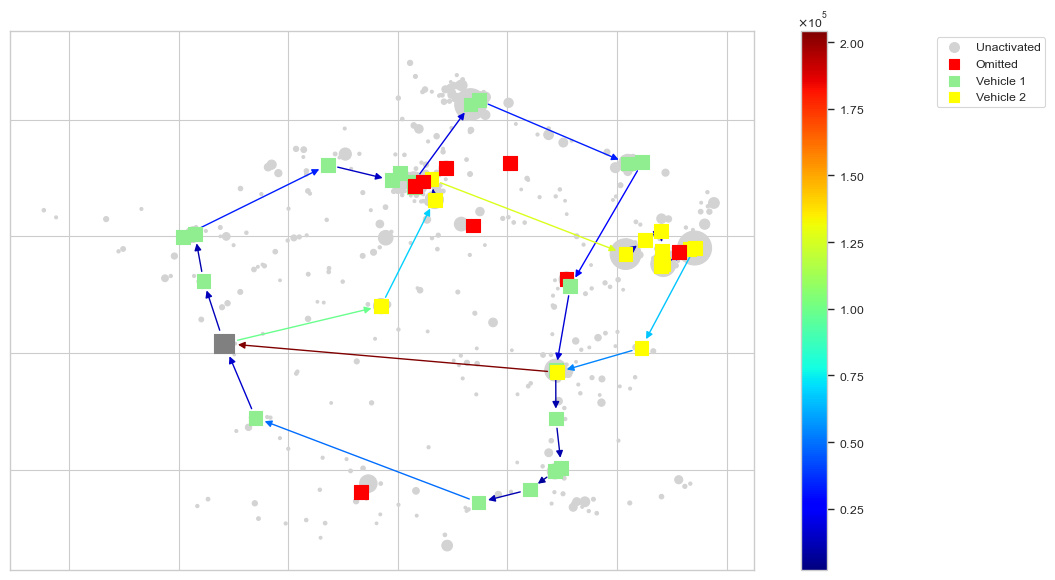

{'assignment': array([1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 2, 2, 1, 2, 2, 1, 2, 1, 1, 2,
        2, 1, 1, 1, 2, 1, 1, 2, 1, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0]),
 'routes': array([[ 0, 25,  7, 26,  9,  1,  5, 21, 28,  4, 18, 11, 20, 42,  3, 10,
         34, 24, 29, 31, 15,  0],
        [ 0, 27,  2, 22, 17, 23, 13,  6, 14, 19, 32, 16,  8, 12, 30,  0,
          0,  0,  0,  0,  0,  0]]),
 'costs per vehicle': array([289., 237.]),
 'omitted': array([464, 287, 247, 485, 392, 483, 466, 473]),
 'remained_quota': np.float64(0.0),
 'episode rewards': np.float64(34.0),
 'quantity accepted': np.float64(34.0),
 'remained capacity': np.float64(6.0),
 'h': 42,
 'j': 42,
 'quantity demanded': np.float64(1.0),
 'dest': np.int64(124)}

In [51]:
env.reset(scenario)
i = 0
for i in range(len(res_RL['actions'][scenario])):
    o, _, d, trun, info = env.step(res_RL['actions'][scenario][i])
    i+=1
    if d or trun:
        break

env.render(display_current_node=False)
info

## VA RL with cluster data

### Plots

In [55]:
import pickle

wo = 'woReOpt'
w = 'wReOpt'
# file = "res_woReOpt_500"
file = "res_clusters_test"
# file = "res_VRP_DoD100_Q100"

# file = "res_VRP_fullDyn"
# file = "res_wReOpt_500"
# file = "res_TSP"
# file = "res_TSP_fullDynamic"
with open(f'results/{file}/{w}/env_configs.pkl', 'rb') as f:
    env_configs = pickle.load(f)
try:
    env_configs["horizon"] = env_configs["K"]
    env_configs.pop("K")
except:
    pass
print(env_configs)

with open(f'results/{file}/res_offline.pkl', "rb") as f:
    res_offline = pickle.load(f)

with open(f'results/{file}/res_RL_DQN_clusters_VA.pkl', "rb") as f:
    res_RL = pickle.load(f)
    
# with open(f'results/{file}/{w}/res_MSA.pkl', "rb") as f:
#     res_MSA = pickle.load(f)

with open(f'results/{file}/{w}/res_greedy.pkl', "rb") as f:
    res_greedy = pickle.load(f)

with open(f'results/{file}/{w}/res_random.pkl', "rb") as f:
    res_random = pickle.load(f)
    
    
with open(f'results/{file}/{wo}/res_greedy.pkl', "rb") as f:
    res_greedy_wo = pickle.load(f)
    
# with open(f'results/{file}/{wo}/res_RL_DQN_VRP_VA.pkl', "rb") as f:
#     res_RL_wo = pickle.load(f)
    
# with open(f'results/{file}/{wo}/res_MSA.pkl', "rb") as f:
#     res_MSA_wo = pickle.load(f)

with open(f'results/{file}/{wo}/res_random.pkl', "rb") as f:
    res_random_wo = pickle.load(f)
    
df_test = pd.DataFrame(columns=["epoch", "rs"])
rs_test = np.load('results/dqn_rs_VA_test.npy')
# rs_test = np.load('results/dqn_real_DoD100_Q100_rs_VA_test.npy')
# rs = np.concatenate(
#     [res_greedy_wo["rs"][None], rs],
#     axis=0
# )
df_test["rs"] = rs_test.flatten()
df_test["epoch"] = np.array([len(rs_test[i])*[i] for i in range(len(rs_test))]).flatten()
df_test

{'horizon': 50, 'Q': 100, 'DoD': 1.0, 'vehicle_capacity': 20, 're_optimization': True, 'costs_KM': [1, 1], 'emissions_KM': [0.1, 0.3], 'n_scenarios': 500, 'cluster_scenario': True, 'test': True}


,epoch,rs
0,0,11.0
1,0,21.0
2,0,18.0
3,0,12.0
4,0,10.0
...,...,...
1106,10,40.0
1107,10,26.0
1108,10,28.0
1109,10,22.0


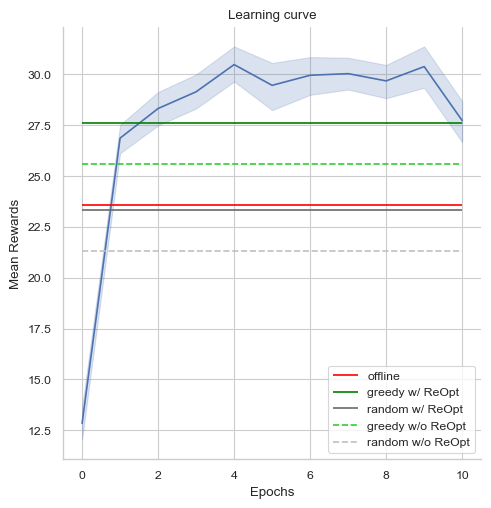

In [56]:
# episode_durations = np.load('results/dqn_rs_VA.npy')
# plt.plot(y, label="RL (DQN)")
# plt.hlines(res_SL["rs"].mean(), 0, 5, 'black', label="SL", linestyles='--')
# sns.relplot(
#     data=df, kind="line",
#     x="epoch", y="rs",
#     errorbar=("ci", 95),
    
#     # markers=True, dashes=False
# )

sns.relplot(
    data=df_test, kind="line",
    x="epoch", y="rs",
    # hue='type',# palette=['orange', 'blue'],
    errorbar=("ci", 95),
    # markers=True, dashes=False
)

# sns.relplot(
#     data=df_test, kind="line",
#     x="epoch", y="rs",
#     errorbar=("ci", 95),
#     # markers=True, dashes=False
# )

plt.hlines(res_offline["rs"].mean(), 0, len(rs), 'red', label="offline", linestyles='solid')
plt.hlines(res_greedy["rs"].mean(), 0, len(rs), 'green', label="greedy w/ ReOpt", linestyles='solid')
plt.hlines(res_random["rs"].mean(), 0, len(rs), 'dimgray', label="random w/ ReOpt", linestyles='solid')
# plt.hlines(res_MSA["rs"].mean(), 0, len(rs), 'orange', label="MSA w/o ReOpt", linestyles='solid')
plt.hlines(res_greedy_wo["rs"].mean(), 0, len(rs), 'limegreen', label="greedy w/o ReOpt", linestyles='--')
plt.hlines(res_random_wo["rs"].mean(), 0, len(rs), 'silver', label="random w/o ReOpt", linestyles='--')
# plt.hlines(res_MSA_wo["rs"].mean(), 0, len(rs), 'orange', label="MSA w/o ReOpt", linestyles='--')

plt.xlabel('Epochs')
plt.ylabel('Mean Rewards')
plt.title('Learning curve')
plt.legend()
plt.show()

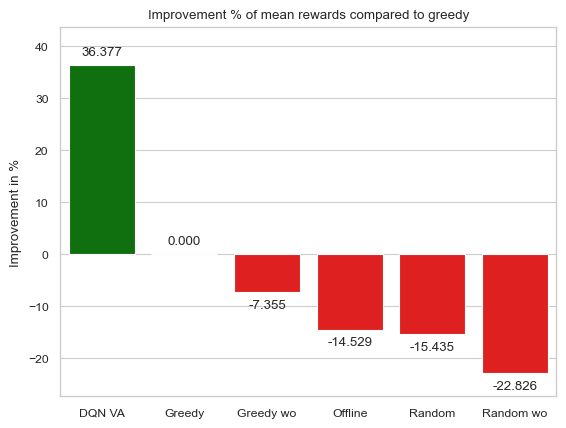

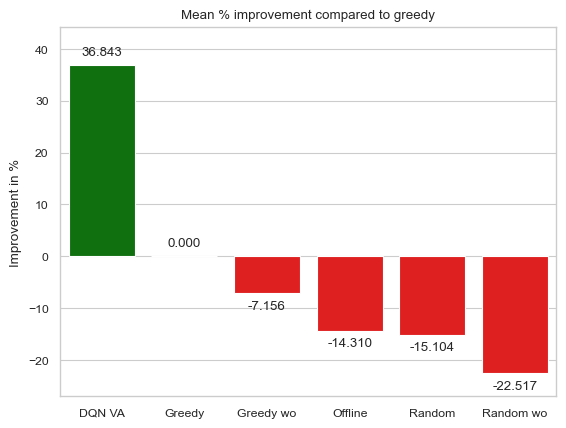

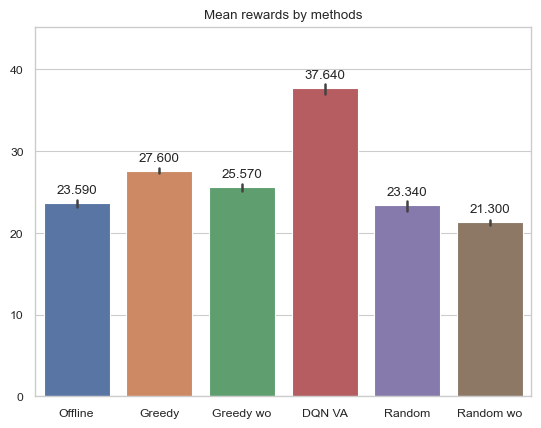

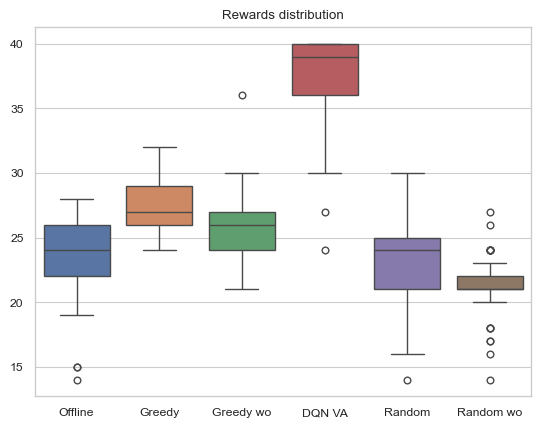

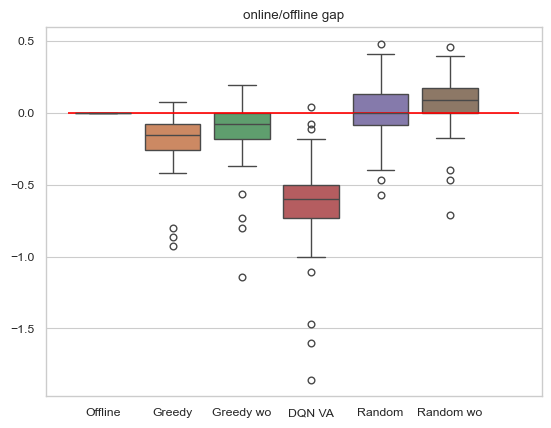

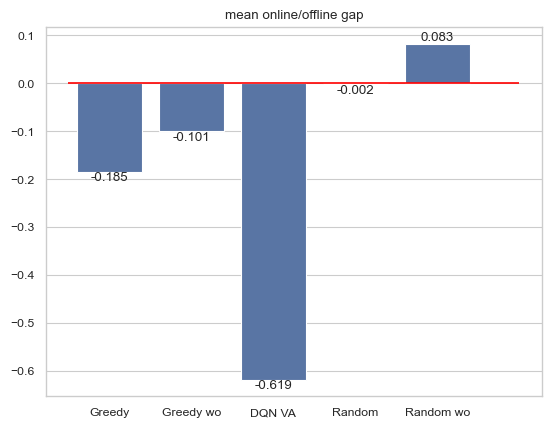

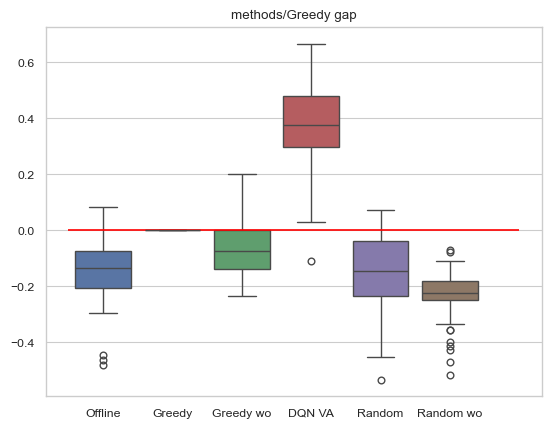

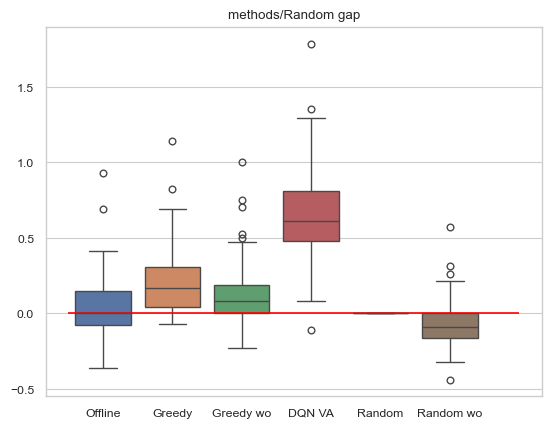

In [57]:
data = {
    "Offline" : res_offline['rs'],
    "Greedy" : res_greedy['rs'],
    "Greedy wo" : res_greedy_wo['rs'],
    # "SL" : res_SL['rs'],
    "DQN VA" : res_RL_wo['rs'],
    # "DQN OA" : res_RL['rs'],
    # "MSA" : res_MSA['rs'],
    # "MSA" : res_MSA['rs'],
    # "MSA wo" : res_MSA_wo['rs'], # w/o ReOpt
    # "DQN u" : res_RL_equiProb['rs'],
    # "RL (PPO)" : res_RL_PPO['rs'], 
    "Random" : res_random['rs'],
    "Random wo" : res_random_wo['rs'],
}

sns.color_palette("deep")
plot(data)

### RL vs greedy

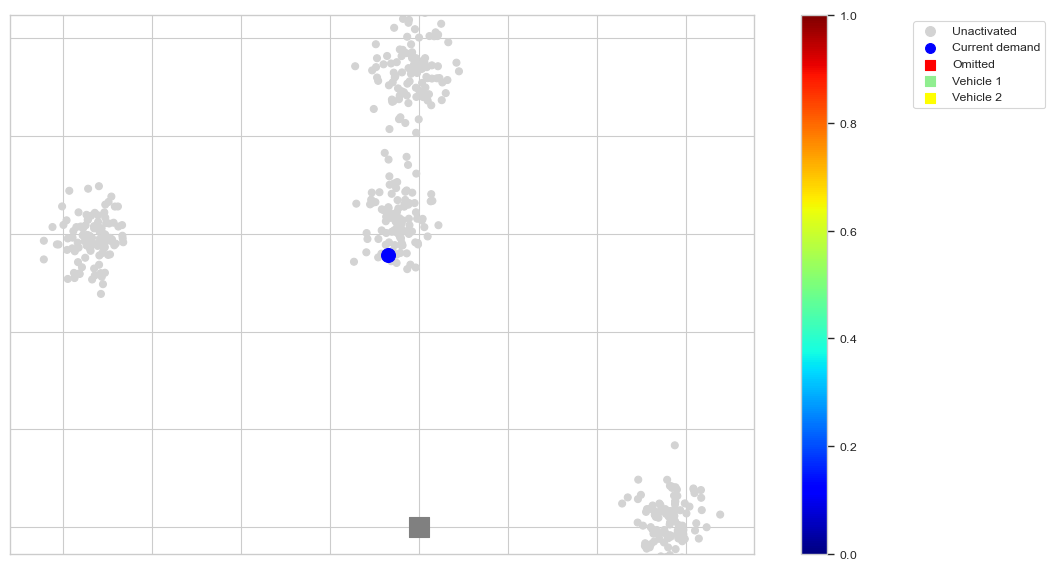

{'horizon': 50,
 'Q': 100,
 'DoD': 1.0,
 'vehicle_capacity': 20,
 're_optimization': True,
 'costs_KM': [1, 1],
 'emissions_KM': [0.1, 0.3],
 'n_scenarios': 500,
 'cluster_scenario': True,
 'test': True}

In [61]:
from envs import DynamicQVRPEnv
scenario = 2

env_configs['vehicle_assignment'] = False
env = DynamicQVRPEnv(**env_configs)
env.reset(scenario)
env.render()
env_configs

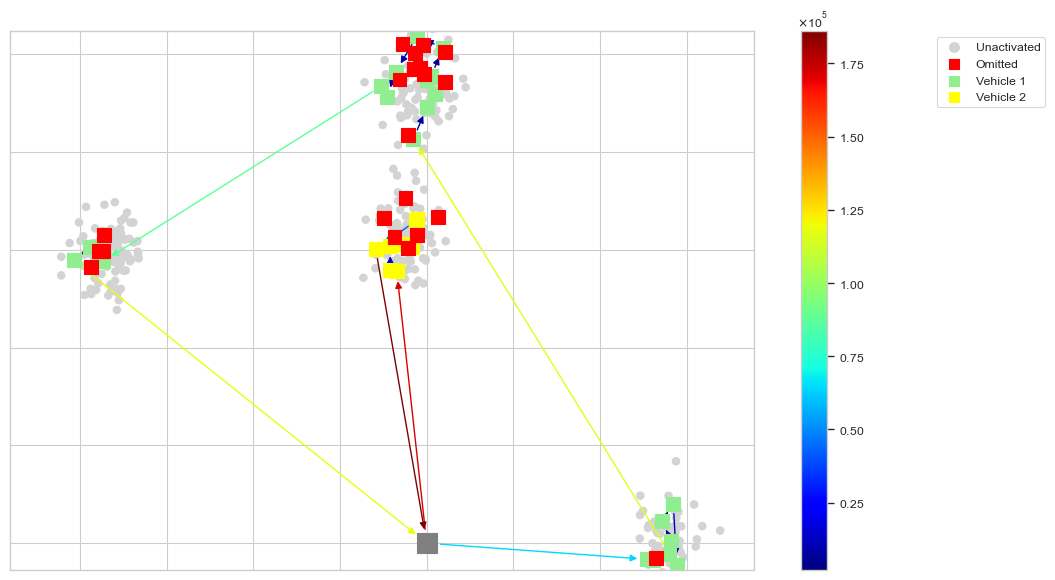

{'assignment': array([2, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1,
        2, 1, 1, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0]),
 'routes': array([[ 0,  8, 25, 24,  9, 19, 27, 20,  4,  5, 16,  7, 12,  2, 22,  6,
         13, 14, 28, 11, 15,  0],
        [ 0,  1, 23, 21, 10, 17,  3, 18, 26,  0,  0,  0,  0,  0,  0,  0,
          0,  0,  0,  0,  0,  0]]),
 'costs per vehicle': array([482., 155.]),
 'omitted': array([ 60, 382, 369, 230, 272, 307, 350, 185, 366, 311, 374, 171, 290,
        232, 109, 261, 206, 340, 189, 352, 308]),
 'remained_quota': np.float64(5.299999999999997),
 'episode rewards': np.float64(28.0),
 'quantity accepted': np.float64(28.0),
 'remained capacity': np.float64(12.0),
 'h': 49,
 'j': 49,
 'quantity demanded': np.float64(1.0),
 'dest': np.int64(21)}

In [59]:
env.reset(scenario)
i = 0
for i in range(len(res_greedy['actions'][scenario])):
    o, _, d, trun, info = env.step(res_greedy['actions'][scenario][i])
    i+=1
    if d or trun:
        break

env.render(display_current_node=False)
info

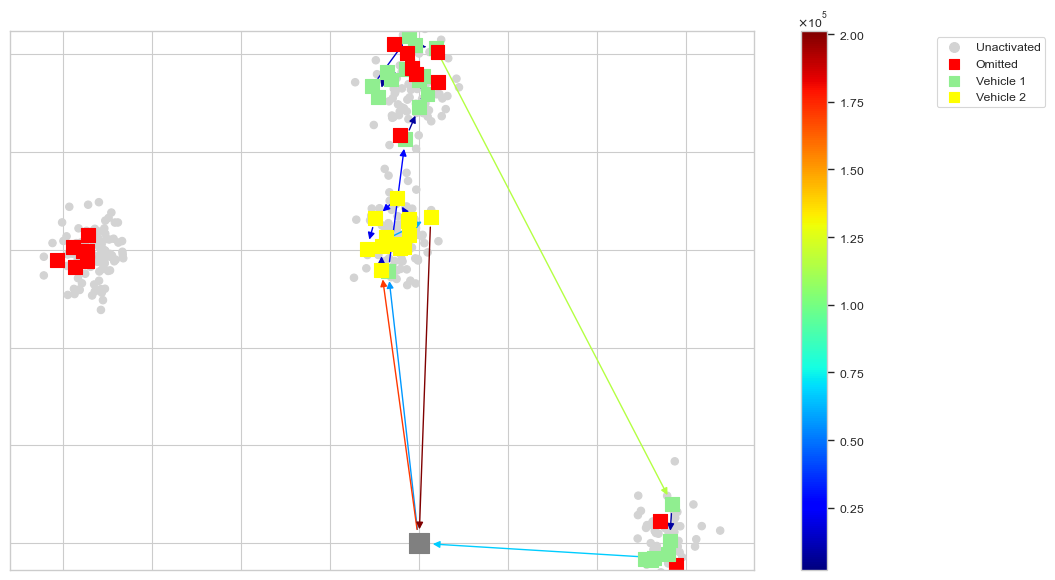

{'assignment': array([1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 0, 1, 1, 1, 0, 1, 2, 2, 0, 0, 2, 1,
        2, 1, 1, 2, 1, 0, 1, 1, 1, 2, 2, 1, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2,
        2, 0, 0, 0, 0, 0]),
 'routes': array([[ 0,  1,  4,  5, 16,  7, 12, 34, 30,  6, 13, 14, 22, 31,  2, 27,
          9, 24, 25,  8, 29,  0],
        [ 0, 23, 21, 41, 10, 33, 17, 45, 18,  3, 42, 32, 26, 44,  0,  0,
          0,  0,  0,  0,  0,  0]]),
 'costs per vehicle': array([352., 188.]),
 'omitted': array([128, 148,  72,  85, 188, 350, 185, 366, 311, 374, 171, 109, 340,
        189, 352, 308]),
 'remained_quota': np.float64(8.400000000000006),
 'episode rewards': np.float64(33.0),
 'quantity accepted': np.float64(33.0),
 'remained capacity': np.float64(7.0),
 'h': 49,
 'j': 49,
 'quantity demanded': np.float64(1.0),
 'dest': np.int64(21)}

In [64]:
env_configs['vehicle_assignment'] = True
env = DynamicQVRPEnv(**env_configs)
env.reset(scenario)
i = 0
for i in range(len(res_RL['actions'][scenario])):
    o, _, d, trun, info = env.step(res_RL['actions'][scenario][i])
    i+=1
    if d or trun:
        break

env.render(display_current_node=False)
info

## Full Dynamic VRP with real data

In [28]:
import pickle

wo = 'woReOpt'
w = 'wReOpt'
# file = "res_woReOpt_500"
# file = "res_clusters_test"
file = "res_VRP_fullDyn"
# file = "res_wReOpt_500"
# file = "res_TSP"
# file = "res_TSP_fullDynamic"
with open(f'results/{file}/{w}/env_configs.pkl', 'rb') as f:
    env_configs = pickle.load(f)
try:
    env_configs["horizon"] = env_configs["K"]
    env_configs.pop("K")
except:
    pass
print(env_configs)


with open(f'results/{file}/res_offline.pkl', "rb") as f:
    res_offline = pickle.load(f)

# with open(f'results/{file}/res_RL_DQN_clusters_VA.pkl', "rb") as f:
#     res_RL = pickle.load(f)

# with open(f'results/{file}/res_MSA.pkl', "rb") as f:
#     res_MSA = pickle.load(f)

with open(f'results/{file}/{w}/res_greedy.pkl', "rb") as f:
    res_greedy = pickle.load(f)

with open(f'results/{file}/{w}/res_random.pkl', "rb") as f:
    res_random = pickle.load(f)
    
with open(f'results/{file}/{wo}/res_greedy.pkl', "rb") as f:
    res_greedy_wo = pickle.load(f)

with open(f'results/{file}/{wo}/res_random.pkl', "rb") as f:
    res_random_wo = pickle.load(f)

{'horizon': 50, 'Q': 70, 'DoD': 1.0, 'vehicle_capacity': 20, 're_optimization': True, 'costs_KM': [1, 1], 'emissions_KM': [0.1, 0.3], 'test': True}


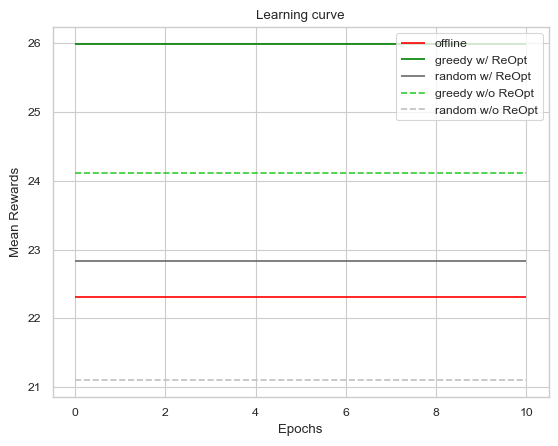

In [29]:
# episode_durations = np.load('results/dqn_rs_VA.npy')
# plt.plot(y, label="RL (DQN)")
# plt.hlines(res_SL["rs"].mean(), 0, 5, 'black', label="SL", linestyles='--')
# sns.relplot(
#     data=df, kind="line",
#     x="epoch", y="rs",
#     errorbar=("ci", 95),
#     # markers=True, dashes=False
# )

# sns.relplot(
#     data=df_test, kind="line",
#     x="epoch", y="rs",
#     errorbar=("ci", 95),
#     # markers=True, dashes=False
# )

plt.hlines(res_offline["rs"].mean(), 0, len(rs), 'red', label="offline", linestyles='solid')
plt.hlines(res_greedy["rs"].mean(), 0, len(rs), 'green', label="greedy w/ ReOpt", linestyles='solid')
plt.hlines(res_random["rs"].mean(), 0, len(rs), 'dimgray', label="random w/ ReOpt", linestyles='solid')
plt.hlines(res_greedy_wo["rs"].mean(), 0, len(rs), 'limegreen', label="greedy w/o ReOpt", linestyles='--')
plt.hlines(res_random_wo["rs"].mean(), 0, len(rs), 'silver', label="random w/o ReOpt", linestyles='--')

plt.xlabel('Epochs')
plt.ylabel('Mean Rewards')
plt.title('Learning curve')
plt.legend()
plt.show()

## others

Different DoDs

In [ ]:
# GreedySL = []
# GreedyRL = []
# x = [1., .95, .9, .85, .8, .75]

# for dod in x:
#     with open(f'results/DoD{dod}/res_SL.pkl', "rb") as f: res_SL = pickle.load(f)
#     with open(f'results/DoD{dod}/res_RL.pkl', "rb") as f: res_RL = pickle.load(f)
#     with open(f'results/DoD{dod}/res_greedy.pkl', "rb") as f: res_greedy = pickle.load(f)
    
#     GreedySL.append(100*(res_SL["rs"].mean()/res_greedy["rs"].mean() -1))
#     GreedyRL.append(100*(res_RL["rs"].mean()/res_greedy["rs"].mean() -1))
    
# print(GreedySL)
# print(GreedyRL)

In [ ]:
# # plt.plot(x, GreedySL)
# plt.plot(x, GreedyRL)
# # plt.axis([max(x), min(x), min(GreedySL), max(GreedySL)])

In [ ]:
from stable_baselines3.common.results_plotter import load_results, ts2xy
from stable_baselines3.common import results_plotter
import pandas as pd

def moving_average(values, window):
    """
    Smooth values by doing a moving average
    :param values: (numpy array)
    :param window: (int)
    :return: (numpy array)
    """
    rolled = pd.Series(values).rolling(window)
    std = np.array(rolled.std())#/np.sqrt(window)
    mean = np.array(rolled.mean())
    # weights = np.repeat(1.0, window) / window
    return mean, std#np.convolve(values, weights, "valid"), std


def plot_results(log_folder, 
                 title="Learning Curve", 
                 label = None,
                 window = 75,
                 ylim = None,
                 n = 0,
                 ):
    """
    plot the results

    :param log_folder: (str) the save location of the results to plot
    :param title: (str) the title of the task to plot
    """
    if n:
        ys = []
        for i in range(n):
            x, y = ts2xy(load_results(log_folder[:-1]+str(i)), "timesteps")
            ys.append(y[:10_000])
            print(len(y))
        y = np.mean(ys, axis=0)
    else:
        x, y = ts2xy(load_results(log_folder), "timesteps")
    y, std = moving_average(y, window=window)
    # Truncate x
    x = x[len(x) - len(y) :]

    fig = plt.figure(title)
    if label is None:
        label = 'mean rewards $\pm 2\sigma$'
    plt.plot(x, y, label=label)
    plt.fill_between(x, y - 2*std, y + 2*std, alpha=0.2)
    plt.xlabel("Number of Timesteps")
    plt.ylabel("Rewards")
    plt.gca().ticklabel_format(axis='x', style='sci', scilimits=(0, 0))
    if ylim is not None:
        plt.ylim(ylim)
    plt.title(title + " Smoothed")
    # plt.legend()
    # plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
    return x
    # plt.show()

<>:48: SyntaxWarning: invalid escape sequence '\p'
<>:48: SyntaxWarning: invalid escape sequence '\p'
/var/folders/6y/xmdymgfj6t79xkdq239jvsmm0000gn/T/ipykernel_14640/2819397349.py:48: SyntaxWarning: invalid escape sequence '\p'
  label = 'mean rewards $\pm 2\sigma$'


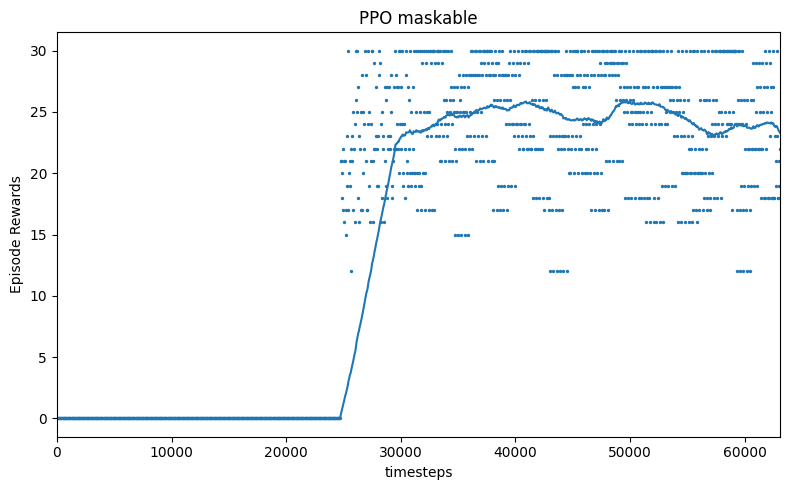

In [ ]:
log_dirPPO = f'methods/ML/models/PPO/'
log_dirDQN = f'methods/ML/models/DQN/'

# log_dir = f'ppo_mask/rewardMode(normalized_terminal)_obsMode(routes)_steps(350000)/'
# log_dir = f'./'
# Helper from the library
results_plotter.plot_results(
    [log_dirPPO], 5e5, results_plotter.X_TIMESTEPS, "PPO maskable", (8, 5)
)

In [13]:
x = plot_results(log_dirDQN, window=500, label='mean RL (DQN)')
_ = plot_results(log_dirPPO, window=500, label='mean RL (PPO)')
plt.hlines(res_greedy["rs"].mean(), 0, x[-1], linestyles = '-.', label=f'mean Greedy', colors='red')
plt.title(f'RL (PPO)\n Learning curve')

plt.legend(loc='lower right')
plt.show()
# plt.ylim(0,1)
# plt.fill_between(x, rs_DP.min(), rs_DP.max(), alpha=0.2)
# _ = plot_results(log_dir2)

NameError: name 'plot_results' is not defined